<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DLBasic/IntroDLwithPytorch10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythorch로 시작하는 딥러닝 10장
RNN에 대하여.
정리 자료 : https://wikidocs.net/60690

## Recurrent Neural Network이란?
순환 신경망, RNN은 Sequence 모델이다.
입력과 출력을 시퀀스 단위로 출력한다.

여기서 시퀀스는, 단어의 어떤 나열을 의미한다. 
딥러닝을 위한 가장 기본적인 형태다.


RNN의 가장 큰 특징은, 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층으로 보내면서, 다시 은닉층의 노드를 계산하는 특성을 가지고 있다.

즉, 은닉층에서 이전의 값을 기억하려는 메모리 역할을 하는 애가 필요한데, 이는 **메모리 셀(RNN 셀)** 이라고 한다.



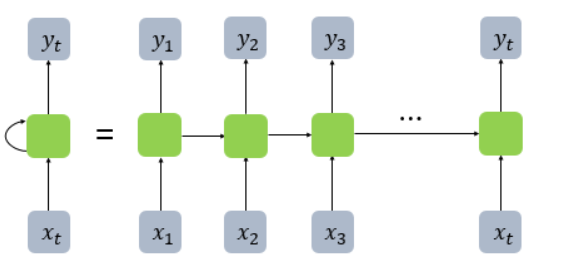


여기서, 입력벡터와 출력베터의 개수에 따라서 모델의 구조가 달라지게 된다.

예시) 스팸메일 필터 : 

### RNN에 대한 수식 표현

기호 정의를 한다.
- $h_{t}$ : 현재 시점 t에서의 은닉 상태값
- $W_{x}$ : 입력을 위한 가중치
- $W_{h}$ : 이전시점 (t-1)의 은닉 상태값인 $h_{t-1}$을 위한 가중치

이를 식으로 표현하면 다음과 동일
- 은닉층 : h_{t} = tanh(W_{x}x_{t} + W_{h}h_{t-1} + b)
- 출력층 : y_{t} = f(W_{y}h_{t} + b)

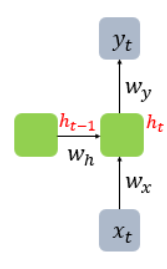

## 파이썬, Pytorch로 RNN 구현

### Python으로 RNN 구현

동작이 되는 형태로 구현하기.
여기서는 (timestep, input_size)로 입력받으나, 실제 pytorch에서는 3D 텐서로 입력을 받는다.

In [3]:
import numpy as np

# 기본 구조
timesteps = 10 # 시점의 수로, NLP에서는 문장의 길이다.
input_size = 4 # 입력의 차원으로, 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기, 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력_2D텐서
hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉상태

# 가중치와 편향 정의하기
Wx = np.random.random((hidden_size, input_size)) # 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # 은닉에 대한 가중치
b = np.random.random((hidden_size,)) # 편향 부여(bias)

# RNN 동작시키기
total_hidden_states = []
for input_t in inputs:
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
  total_hidden_states.append((list(output_t))) # 은닉 상태 계속 축적한다.
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)
print(total_hidden_states)

[[0.95029043 0.94078403 0.77169043 0.85241894 0.97035796 0.96807527
  0.92418203 0.95277024]
 [0.99997223 0.99995461 0.99980895 0.99966532 0.99998684 0.9998667
  0.99999213 0.99999459]
 [0.99998016 0.99996276 0.999903   0.99965031 0.99998604 0.99985035
  0.99999582 0.99999796]
 [0.99998777 0.99998973 0.9999411  0.99977776 0.99999595 0.99993173
  0.99999845 0.99999926]
 [0.99997028 0.9999687  0.99986404 0.99966923 0.99999015 0.99981254
  0.99999591 0.99999662]
 [0.99999591 0.99999453 0.99995904 0.99995431 0.9999989  0.99997708
  0.99999921 0.99999944]
 [0.99996897 0.9999568  0.99986543 0.99949635 0.99998259 0.99975512
  0.99999503 0.99999681]
 [0.99997979 0.999968   0.99988228 0.99986149 0.99999389 0.9998999
  0.99999583 0.99999645]
 [0.99993803 0.99993771 0.99983899 0.99975158 0.99998885 0.99986457
  0.9999894  0.99999385]
 [0.99997094 0.99995486 0.99989037 0.99960823 0.99998438 0.9998405
  0.99999435 0.99999744]]


최종 은닉층을 바탕으로, 거기서 활성화 함수를 통해, 출력층을 보내고 정답을 고르는 문제가 된다.

### Pytorch를 통한 구현

In [ ]:
import torch
import torch.nn as nn

input_size = 5  # 입력의 크기
hidden_size = 8  # 은닉 상태의 크기

#input = (batch size, time_steps, input_size)
inputs = torch.Tensor(1, 10, input_size)

# cell 정의
cell = nn.RNN(input_size, hidden_size, batch_first = True)

# outputs : 모든 시점의 은닉 상태
# _status : 마지막 시점의 은닉 상태
outputs, _status = cell(inputs)

print(_status)

RNN도 다수의 은닉층을 가질 수 있다. 순환 신경망에서 은닉층을 더 추가해보자.

In [8]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)
outputs, _status = cell(inputs)

print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


## 양방향 순환 신경망
(Bidirectional Recurrent Neural Network)

NLP문제의 경우, 과거 시점뿐만이 아니라 향후 시점의 데이터를 고려해야 한다.

문장은 앞뒤단어 그 이상을 봐서 정답을 결정해야 한다.

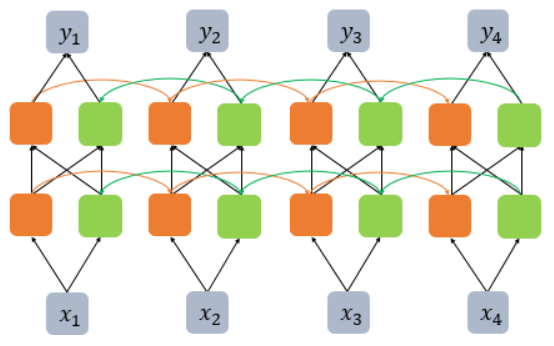

In [9]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)
outputs, _status = cell(inputs)

print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


outputs.shape에서 은닉 상태가 두배가 된 이유는 정방향, 역방향 은닉상태 값이 서로 연결되어 2배가 되었다.

_status.shape에서 층이 2배가 된 이유는
정방향에서는, 마지막 시점, 역방향에서는 첫번째 시점에 해당하는 시점의 출력값을 층의 개수 만큼 쌓아 올렸다.